In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plotly is an advanced visualization tool
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

In [406]:
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\1_Bhiwadi\Book_1_PM.csv')
df.head()
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,PM2.5
0,2021-01-01,228.53
1,2021-02-01,222.37
2,2021-03-01,128.14
3,2021-04-01,68.44
4,2021-05-01,62.51


In [407]:
df = df.set_index('Date').asfreq('D')

In [408]:
df.columns = ['PM2.5']

In [409]:
print(f'The Daily data consists of values from {df.index.min()} to {df.index.max()}')

The Daily data consists of values from 2021-01-01 00:00:00 to 2021-12-31 00:00:00


In [410]:
# Finding the split point index to keep 1 month (30 days) data as test set
n_test = 0
train_data = df.iloc[:len(df) - n_test]
test_data = df.iloc[len(df) - n_test:]

In [411]:
train_data['PM2.5']

Date
2021-01-01    228.53
2021-01-02    168.62
2021-01-03    140.78
2021-01-04    126.76
2021-01-05    107.38
               ...  
2021-12-27     92.11
2021-12-28    124.25
2021-12-29    105.15
2021-12-30    161.22
2021-12-31    156.41
Freq: D, Name: PM2.5, Length: 365, dtype: float64

In [412]:
from arch import arch_model
am = arch_model(train_data['PM2.5'], vol='Garch', p=3, o=3, q=3, dist='Normal')

In [413]:
res = am.fit(disp='off')
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1992.52
Distribution:                  Normal   AIC:                           4007.04
Method:            Maximum Likelihood   BIC:                           4049.94
                                        No. Observations:                  365
Date:                Sun, Aug 14 2022   Df Residuals:                      364
Time:                        14:58:59   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           117.8597      4.572     25.779 1.522e-146 [1.089e+02,1.268e+02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega       1711.3873   1019.419      1.679  9.319e-02 [-2.866e+02,3.709e+03]
alpha[1]       0.1336      0.132      1.009      0.313      [ -0.126,  0.393]
alpha[2]       0.0000      0.106      0.000      1.000      [ -0.207,  0.207]
alpha[3]       0.0000  9.172e-02      0.000      1.000      [ -0.180,  0.180]
gamma[1]       0.0218      0.148      0.147      0.883      [ -0.269,  0.313]
gamma[2]       0.4478      0.182      2.464  1.375e-02    [9.156e-02,  0.804]
gamma[3]       0.2750      0.415      0.663      0.508      [ -0.538,  1.089]
beta[1]        0.0571      0.497      0.115      0.908      [ -0.917,  1.031]
beta[2]        0.0000      0.232      0.000      1.000      [ -0.455,  0.455]
beta[3]        0.0000      0.201      0.000      1.000      [ -0.394,  0.394]
=============================================================================

Covariance estimator: robust
"""

In [414]:
df['Prediction'] = 0.1 * np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + 
                                   res.conditional_volatility**2 * res.params['beta[1]'])

In [415]:
df

,PM2.5,Prediction
Date,,
2021-01-01,228.53,5.962821
2021-01-02,168.62,4.826293
2021-01-03,140.78,4.406239
2021-01-04,126.76,4.281247
2021-01-05,107.38,4.278776
...,...,...
2021-12-27,92.11,4.417999
2021-12-28,124.25,4.276912
2021-12-29,105.15,4.306341


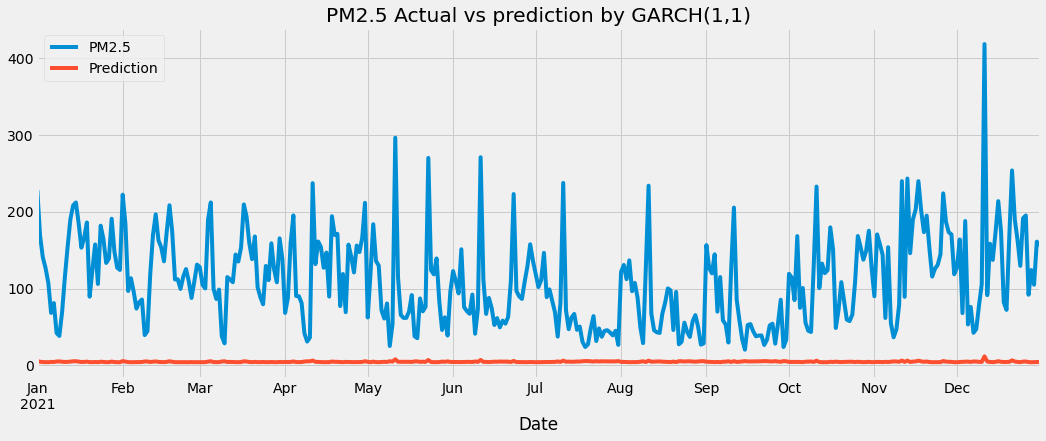

In [416]:
plt.figure(figsize=(16,6))
df["PM2.5"].plot()
df["Prediction"].plot()
plt.title("PM2.5 Actual vs prediction by GARCH(1,1)")
plt.legend()
plt.show()

In [417]:
# Extract the predicted and true values of our time series
y_forecasted = df['Prediction']
y_truth = y['2021-01-01':]


# Accuracy metrics
# Compute the mean square error
from sklearn.metrics import mean_squared_error, r2_score
r2=r2_score(y_forecasted,y_truth)
print('r2 score')
print(r2)
#print("R2 score : %.2f" % r2_score(y_forecasted,y_truth))

mae = np.mean(np.abs(y_forecasted - y_truth))    # MAE
print('MAE')
print(mae)

mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE')
print(mse)
#print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

rmse = np.mean((y_forecasted - y_truth)**2)**.5  # RMSE
print('RMSE')
print(rmse)

mape = np.mean(np.abs(y_forecasted - y_truth)/np.abs(y_truth))
print('MAPE')
print(mape)   


r2 score
-10960.673874955775
MAE
56.92460543978384
MSE
4460.471690322169
RMSE
66.7867628375726
MAPE
0.893933042723948
